<a href="https://colab.research.google.com/github/reduyema21/AI-Group-3/blob/main/Rediet27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [1]:
df.columns

NameError: name 'df' is not defined

In [130]:
df = pd.read_csv(r"C:\Users\ICT\Desktop\new\AI-Group-3\Data\water_quality.csv")
# Desktop/new/AI-Group-3/Data/water_quality.csv?
df.head()

Hardness        Solids  Chloramines     Sulfate  Organic_carbon  \
0  204.890455  20791.318981     7.300212  368.516441       10.379783   
1  129.422921  18630.057858     6.635246  333.073546       15.180013   
2  224.236259  19909.541732     9.275884  333.073546       16.868637   
3  214.373394  22018.417441     8.059332  356.886136       18.436524   
4  181.101509  17978.986339     6.546600  310.135738       11.558279   

   Chloramine_Sulfate_ratio  Organic_Trihalo_ratio  log_Solids  ph_squared  \
0                  0.019810               0.119320    9.942339   49.515880   
1                  0.019921               0.269488    9.832585   13.809251   
2                  0.027849               0.253969    9.899005   65.595813   
3                  0.022582               0.183737    9.999680   69.168595   
4                  0.021109               0.361219    9.797015   82.668527   

   Solids_bins  Potability  
0          1.0           0  
1          1.0           0  
2          1.0           0  
3          1.0           0  
4          1.0           0

In [132]:
df.describe()

Hardness        Solids  Chloramines      Sulfate  Organic_carbon  \
count  3276.000000   3276.000000  3276.000000  3276.000000     3276.000000   
mean    196.369496  22014.092526     7.122277   333.608364       14.284970   
std      32.879761   8768.570828     1.583085    36.143851        3.308162   
min      47.432000    320.942611     0.352000   129.000000        2.200000   
25%     176.850538  15666.690297     6.127421   317.094638       12.065801   
50%     196.967627  20927.833607     7.130299   333.073546       14.218338   
75%     216.667456  27332.762127     8.114887   350.385756       16.557652   
max     323.124000  61227.196008    13.127000   481.030642       28.300000   

       Chloramine_Sulfate_ratio  Organic_Trihalo_ratio   log_Solids  \
count               3276.000000            3276.000000  3276.000000   
mean                   0.021608               0.238487     9.911939   
std                    0.005572               0.423579     0.445392   
min                    0.001476               0.025364     5.774373   
25%                    0.018218               0.171755     9.659356   
50%                    0.021359               0.215236     9.948883   
75%                    0.024489               0.267402    10.215878   
max                    0.072382              23.822089    11.022363   

        ph_squared  Solids_bins   Potability  
count  3276.000000  3276.000000  3276.000000  
mean     52.204572     1.291819     0.390110  
std      21.261101     0.769856     0.487849  
min       0.000000     0.000000     0.000000  
25%      39.409174     1.000000     0.000000  
50%      49.515880     1.000000     0.000000  
75%      61.937683     2.000000     1.000000  
max     196.000000     4.000000     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Hardness                    0
Solids                      0
Chloramines                 0
Sulfate                     0
Organic_carbon              0
Chloramine_Sulfate_ratio    0
Organic_Trihalo_ratio       0
log_Solids                  0
ph_squared                  0
Solids_bins                 0
Potability                  0
dtype: int64

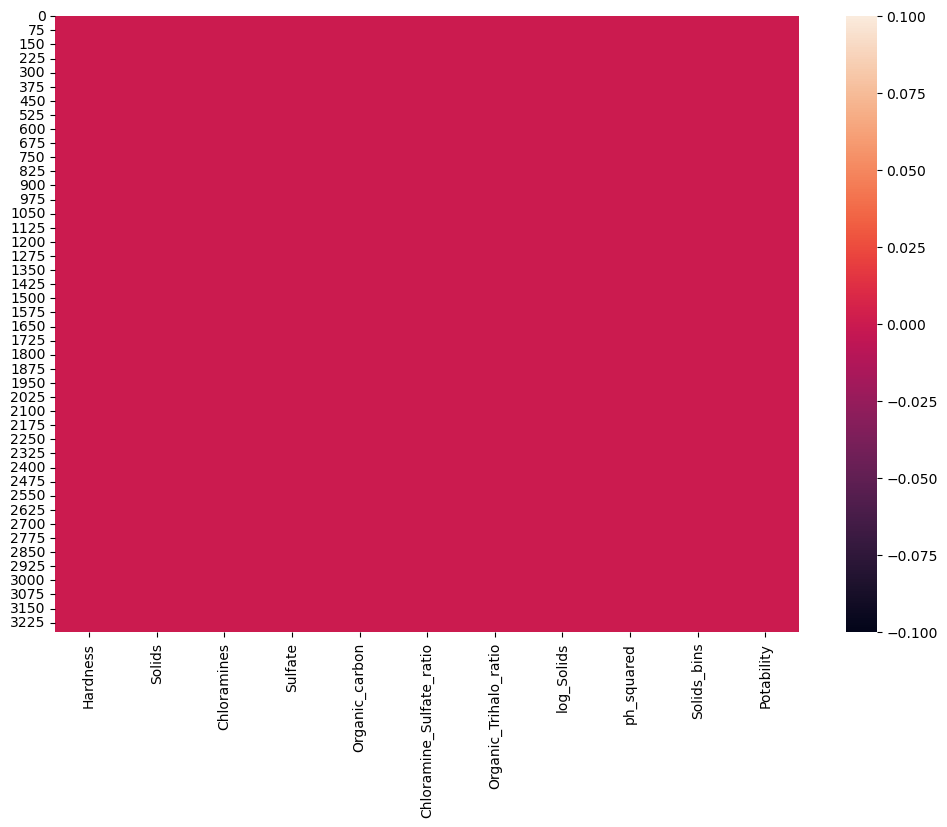

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
df.isna().sum()



<Axes: >

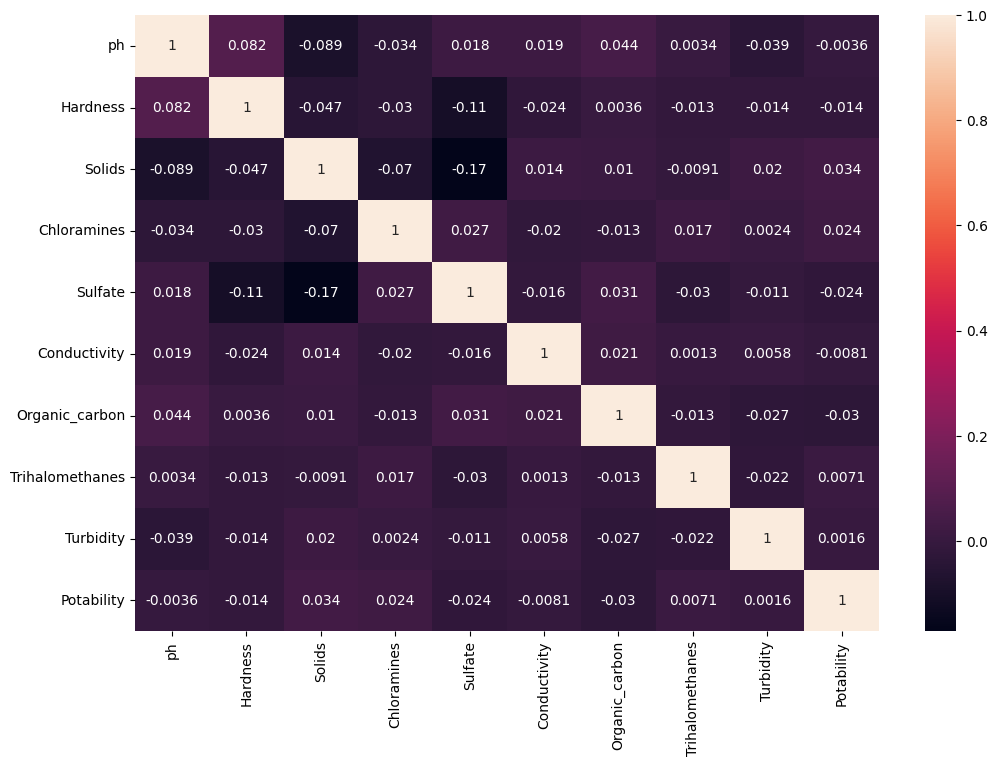

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

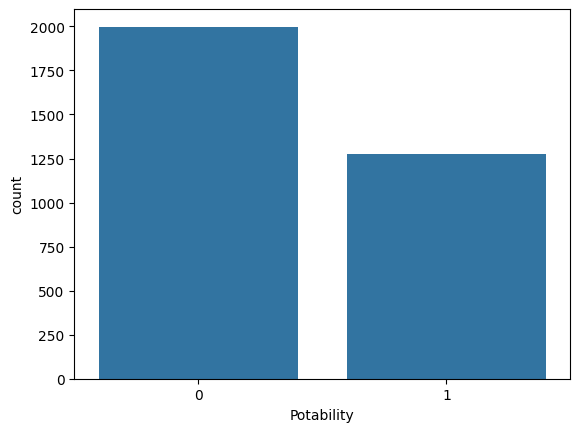

In [ ]:
sns.countplot(x="Potability",data=df)

In [ ]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

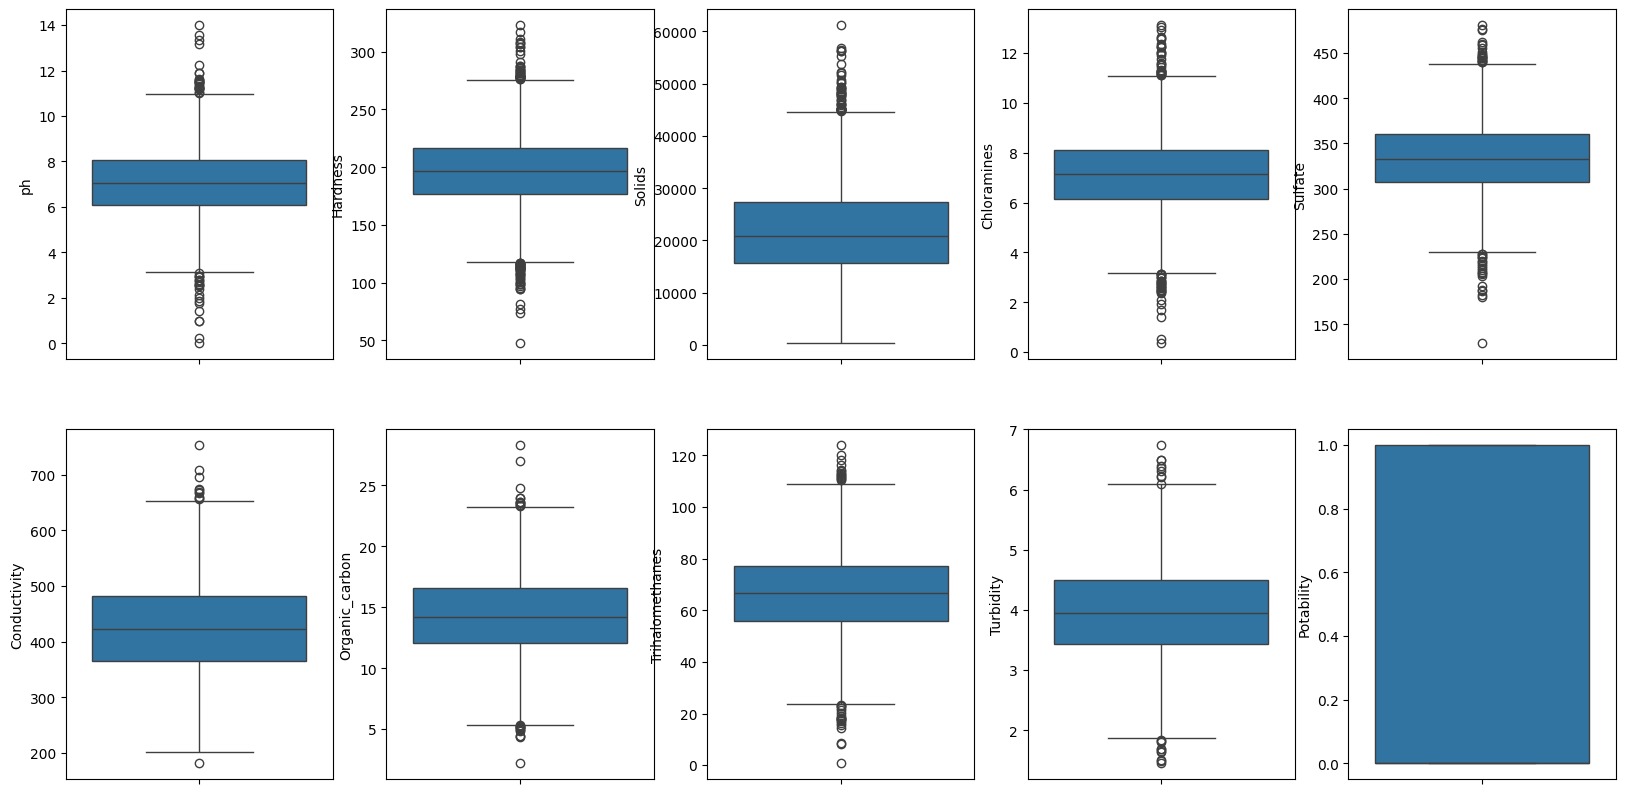

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))
ax = ax.flatten()
index = 0
for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index +=1

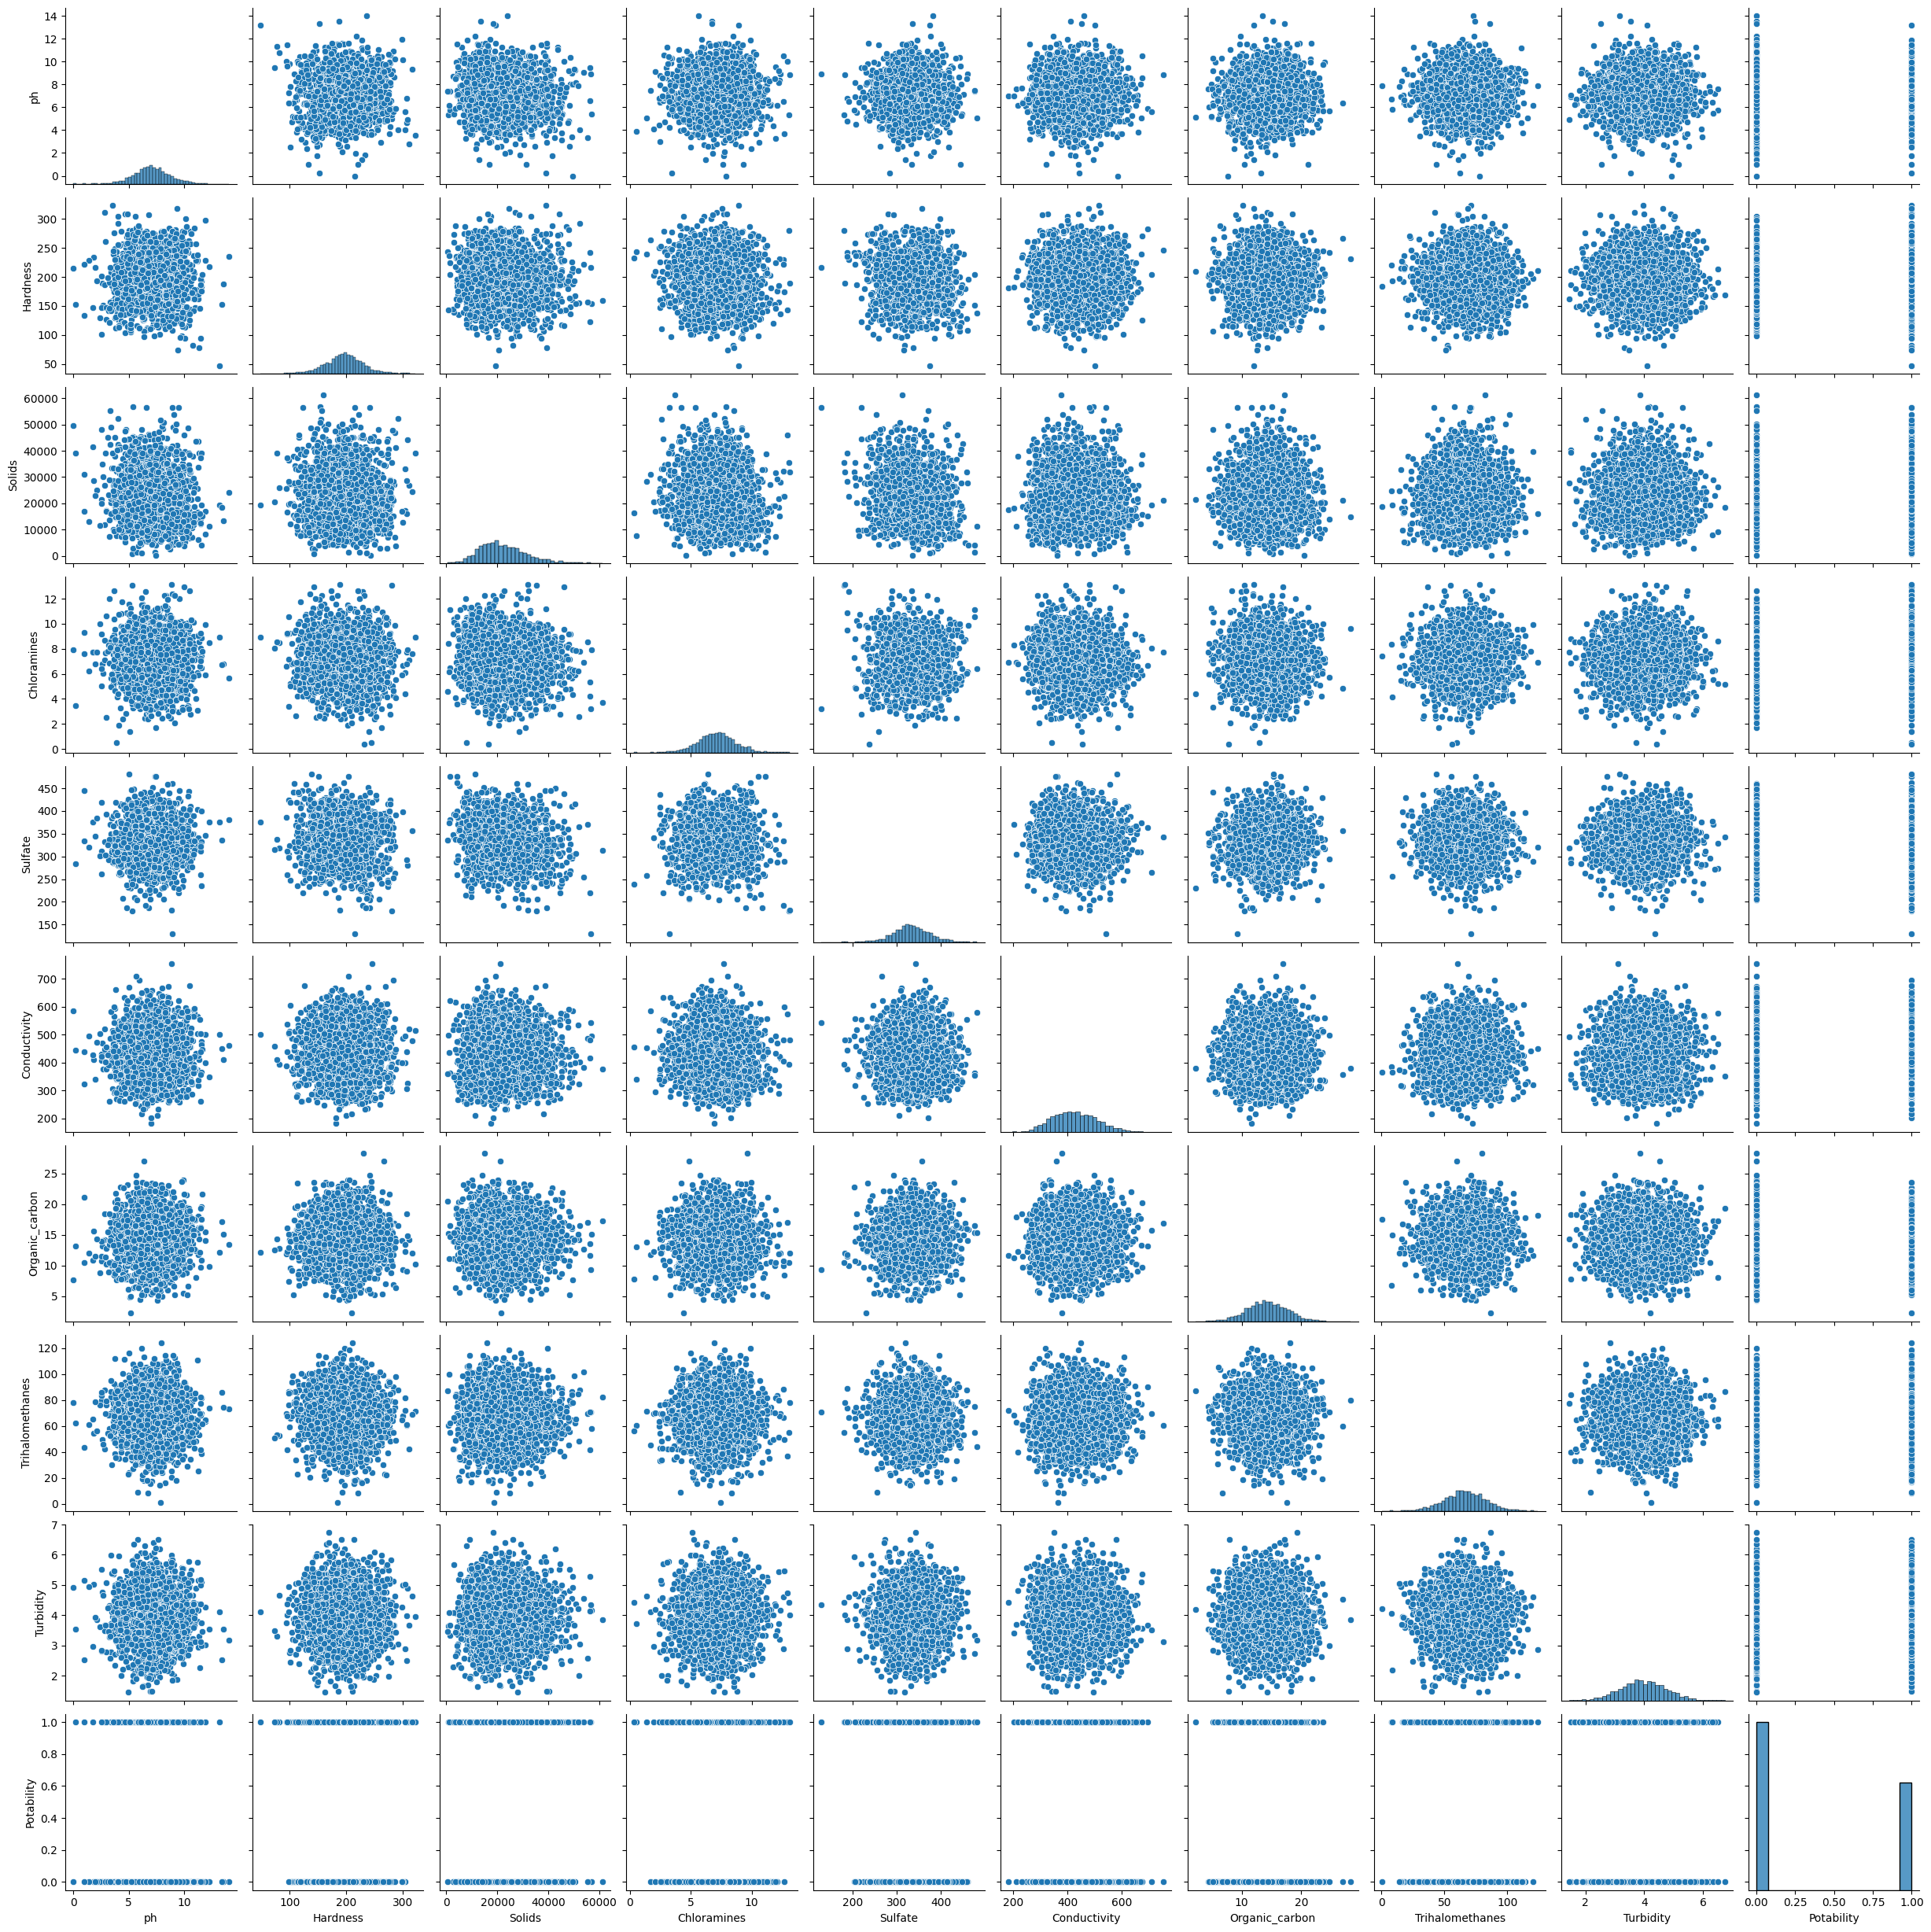

In [ ]:
sns.pairplot(df)

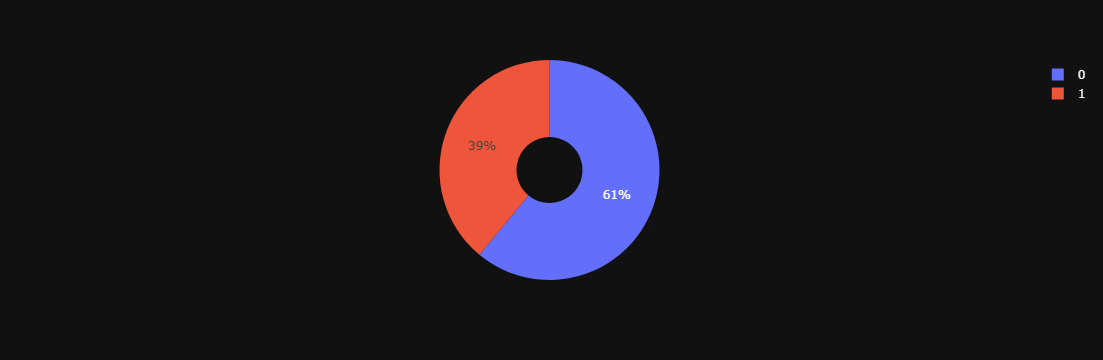

In [140]:
fig = px.pie(df,names= "Potability",hole = 0.3, template="plotly_dark")
fig.show()

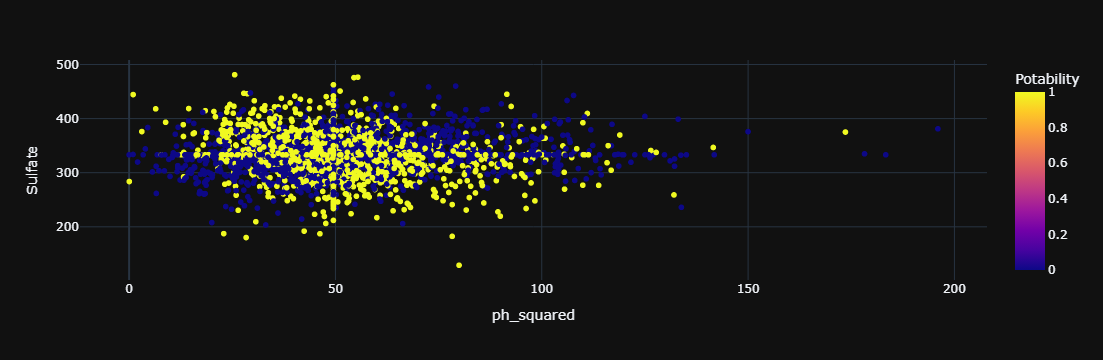

In [150]:
# i correctly showed 
import plotly.express as px

fig = px.scatter(df, x="ph_squared", y="Sulfate", color="Potability", template="plotly_dark")
fig.show()



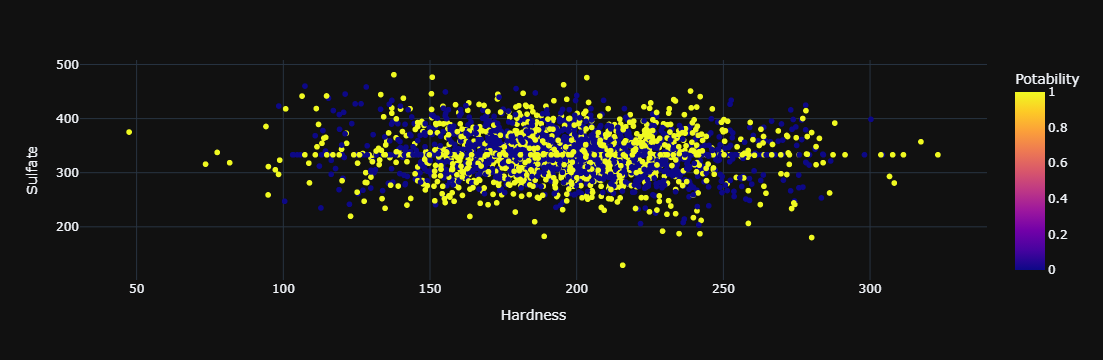

In [162]:
fig = px.scatter(df, x="Hardness", y="Sulfate", color="Potability", template="plotly_dark")
fig.show()



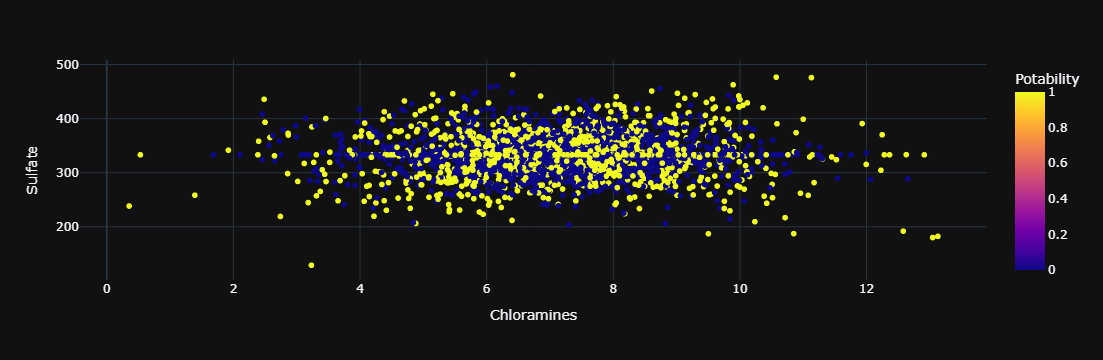

In [168]:
fig = px.scatter(df, x="Chloramines", y="Sulfate", color="Potability", template="plotly_dark")
fig.show()


Text(0, 0.5, 'Percentage of missing values')

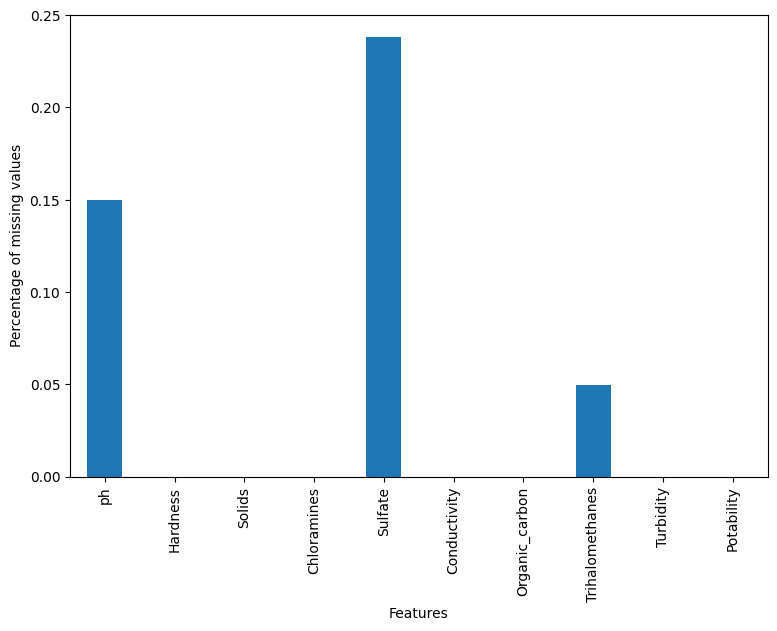

In [ ]:
df.isnull().mean().plot.bar(figsize = (9,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")


In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

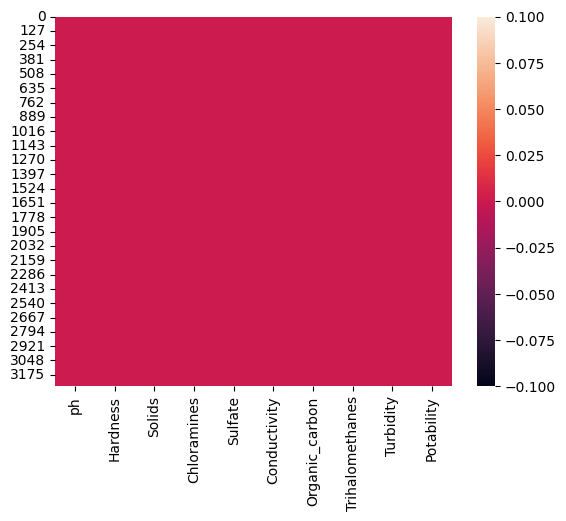

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
x = df.drop("Potability",axis=1)
y = df["Potability"]


In [ ]:
x.shape , y.shape

((3276, 9), (3276,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape ,x_test.shape

((2620, 9), (656, 9))

In [ ]:
# Assume the target variable is 'Water_Quality_Index'
X = df.drop(columns=['ph'])  # Features
y = df['ph']  # Target variable


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# to standardize features

Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
# to train Lasso reg model

Lasso(alpha=0.1)

In [ ]:
y_pred = lasso.predict(x_test)
# to predict on test data

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
#to evaluate model performance

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.23631005534386673
R-squared Score: -0.0003710980911733053


In [ ]:

# Display feature importance
feature_importance = pd.Series(lasso.coef_, index=df.drop(columns=['ph']).columns)
print("\nFeature Importance (Lasso Coefficients):")
print(feature_importance[feature_importance != 0])  # Only non-zero coefficients



Feature Importance (Lasso Coefficients):
Series([], dtype: float64)


In [ ]:
y_pred_continuous = lasso.predict(x_test)

# Convert predictions to binary class (0 or 1)
y_pred_class = np.where(y_pred_continuous >= 0.5, 1, 0)

# Calculate accuracy
accuracy_score_lar = accuracy_score(y_test, y_pred_class)
print("Accuracy Score (Lasso):", accuracy_score_lar*100)

Accuracy Score (Lasso): 61.737804878048784


Decision Tree

In [ ]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth= 4)

In [ ]:
#train Decision
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#making prediction using DT
pred_dt = model_dt.predict(x_test)

In [ ]:
#check the accuracy
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

62.95731707317073

In [ ]:
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[356,  49],
       [194,  57]])

Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
#training the model
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#prediciton
pred_rf = model_rf.predict(x_test)

In [ ]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100


67.53048780487805

In [ ]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[355,  50],
       [163,  88]])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#crateing the model object


In [ ]:
for i in range(4,20):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

4 0.6432926829268293
5 0.6341463414634146
6 0.6463414634146342
7 0.6432926829268293
8 0.6570121951219512
9 0.6417682926829268
10 0.6509146341463414
11 0.635670731707317
12 0.6402439024390244
13 0.6432926829268293
14 0.6341463414634146
15 0.6341463414634146
16 0.6402439024390244
17 0.6295731707317073
18 0.6310975609756098
19 0.6417682926829268


In [ ]:
  model_knn = KNeighborsClassifier(n_neighbors=15)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn*100)

19 63.41463414634146


XGBoosT

In [ ]:
from xgboost import XGBClassifier
#create a model
#model_xgb = XGBClassifier(n_estimators=100,learning_rate=0.05)

In [ ]:
model = XGBClassifier(
    learning_rate=0.04,n_estimators=200,max_depth=4,random_state=42,use_label_encoder=False,
    eval_metric='logloss'
)


In [ ]:
pred_xgb = model_xgb.predict(x_test)

In [ ]:
#accuracy
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

66.76829268292683

In [ ]:
model = pd.DataFrame({
    "Models" : ["Decision Tree","Random Forest","KNN","XGBoost",
               "Lasso Regression"],
    "Accuracy Score" : [accuracy_score_dt,accuracy_score_rf,accuracy_score_knn,
                        accuracy_score_xgb,accuracy_score_lar]
})

In [ ]:
print(model)


             Models  Accuracy Score
0     Decision Tree        0.629573
1     Random Forest        0.675305
2               KNN        0.634146
3           XGBoost        0.667683
4  Lasso Regression        0.617378


In [ ]:
colors = ['#42f5e9', '#e968fc', '#b0fc90']

<ipython-input-153-c29e1c044bde>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-153-c29e1c044bde>:1: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



Models  Accuracy Score
1     Random Forest        0.675305
3           XGBoost        0.667683
2               KNN        0.634146
0     Decision Tree        0.629573
4  Lasso Regression        0.617378

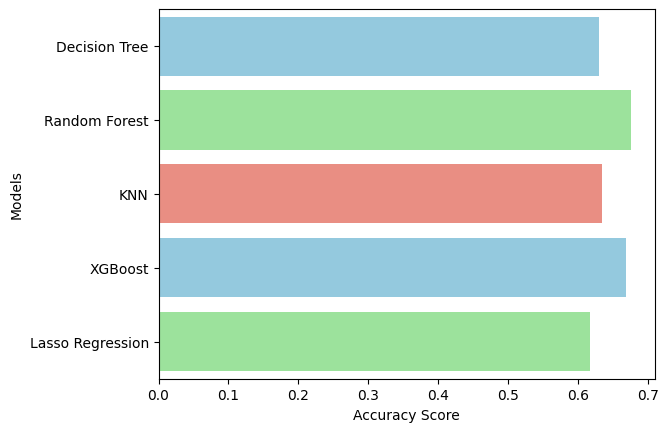

In [ ]:
sns.barplot(x="Accuracy Score",y="Models",data=model, palette=colors)

model.sort_values(by="Accuracy Score",ascending= False)